# readme
descrip: plot SSH decomposition terms time series in North and South US east coasts for CESM from 1850-2100

update history: <br>
v1.0 DL 2021Jan19 <br>
v1.1 DL 2021Aug23

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.dates as mdates
%matplotlib inline
# import proplot as plot
# import cartopy
# import cartopy.crs as ccrs
# cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.129:36327")
client

<Client: 'tcp://10.73.3.129:36327' processes=16 threads=16, memory=316.64 GiB>

# define parameters

In [3]:
# # === Gulf of Maine (GMa) ===
# lat1_GMa, lat2_GMa = 25, 55
# lon1_GMa, lon2_GMa = -85, -50 # GMa: Gulf of Maine

# lon1b_GMa, lon2b_GMa = -71+360, -66+360  # b: box, highlight region with a box 
# lat1b_GMa, lat2b_GMa = 42, 45
# # ===========================

# # === Gulf of Maxico (GMe) ===
# lat1_GMe, lat2_GMe = 15, 35
# lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico

# lon1b_GMe, lon2b_GMe = -95+360, -85+360 # b: box, highlight region with a box 
# lat1b_GMe, lat2b_GMe = 23, 28
# # ============================

# === r: region (US east coast excluding Gulf of Mexico) ===
# reference: Plot2FindGulfMexicoYucatanChannelFLstraitnlatnlonIndex_2021Jul20.ipynb
nlon1_r_t12, nlon2_r_t12 = 200, 700 
nlat1_r_t12, nlat2_r_t12 = 1300, 2000

nlon1_r_g16, nlon2_r_g16 = 260, 321
nlat1_r_g16, nlat2_r_g16 = 230, 350

lon1_r, lon2_r = -85, -50
lat1_r, lat2_r = 25, 55

# box1 (bx1), southeast US coast box
lon1_bx1, lon2_bx1 = -82, -79
lat1_bx1, lat2_bx1 = 30, 33

# box2 (bx2), northeast US coast box
lon1_bx2, lon2_bx2 = -71, -68
lat1_bx2, lat2_bx2 = 40.5, 43.5
# ===========================================================

# time2 = np.arange(2001.5,2100.5+1) # 2001-2100 time period 2
time_en = np.arange(1850,2100+1,1) # 1850-2100 entire time period
time_obs = np.arange(1993.5,2019.5+1) # time period for AVISO obs (1993-2019)

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir+'DSLDecompoTimeSeriesUSEastCoastCESM_2021Aug20.png'
pic2 = outdir+'DSLDecompoTimeSeriesNortheastCoastCESMAVISO_2021Aug20.png'

# read files 

In [4]:
#TH: transient HR
infile_ssh_TH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
                 'data_after_manipulation/SSH/'
                 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc')

ds_ssh_TH_raw = xr.open_dataset(infile_ssh_TH,chunks=chunks_HR)
ds_ssh_TH = ds_ssh_TH_raw.assign_coords(time=time_en)

infile1_ssh_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
                  'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_ssh_CH_raw = xr.open_dataset(infile1_ssh_CH, chunks=chunks_HR)
print(ds_ssh_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_ssh_CH = xr.cftime_range(start="1621", end="2102", freq='Y', calendar='noleap') 
# 2102 is not included, 2101 is the last year
ds_ssh_CH = ds_ssh_CH_raw.assign_coords(time=time_ssh_CH).sel(time=slice('1850','2100')).assign_coords(time=time_en)
ds_ssh_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time        (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(251, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [5]:
infile1_ssh_TL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
                  'data_after_manipulation/SSH/'
                  'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds_ssh_TL = ds_ssh_TL.assign_coords(time=time_en)

infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
                  'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
print(ds_ssh_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# 2101-01 is not included, the last time is 2100-12
ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL).sel(time=slice('1850','2100')).resample(
                          time='A').mean('time').assign_coords(time=time_en)
ds_ssh_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 251)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [6]:
infile_hst_TH = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_hst_TH_raw = xr.open_dataset(infile_hst_TH) # do not use dask because I will drop 2033, 2038 and 2052 spike values
# Warning occurrs with chunks=chunks_HR (PerformanceWarning: Slicing is producing a large chunk.) 
ds_hst_TH_raw = ds_hst_TH_raw.assign_coords(time=time_en)

ds_hst_TH_despk = ds_hst_TH_raw.drop_sel(time=[2033,2038,2052]) 
# despk: despike, 2033, 2038, 2052 are spikes in global av steric height time series, drop them
ds_hst_TH = ds_hst_TH_despk.interp(time=time_en)
ds_hst_TH

infile_hst_CH = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_hst_CH_raw = xr.open_dataset(infile_hst_CH,chunks=chunks_HR)
ds_hst_CH = ds_hst_CH_raw.assign_coords(time=time_en)
ds_hst_CH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>

In [7]:
infile_hst_TL = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_hst_TL_raw = xr.open_dataset(infile_hst_TL,chunks=chunks_LR)

yrs_TL = time_en[time_en != 2014] # TL miss 2014Jan, so no yr-av for 2014

ds_hst_TL_raw = ds_hst_TL_raw.assign_coords(time=yrs_TL)
ds_hst_TL = ds_hst_TL_raw.interp(time=time_en).assign_coords(time=time_en)
ds_hst_TL 

infile_hst_CL = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_hst_CL_raw = xr.open_dataset(infile_hst_CL,chunks=chunks_LR)

yrs_CL_raw = np.arange(250,500+1)
yrs_CL = np.delete(yrs_CL_raw,[374-250, 398-250, 401-250, 417-250, 445-250]) # missing values in these years

ds_hst_CL_raw = ds_hst_CL_raw.assign_coords(time=yrs_CL)
ds_hst_CL = ds_hst_CL_raw.interp(time=yrs_CL_raw).assign_coords(time=time_en)
ds_hst_CL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 251)
Coordinates:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 384, 320), meta=np.ndarray>

In [8]:
# infile_ssh_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
#                   'ADT_Vgeo_CMEMS/dt_global_allsat_phy_l4_1993-2019_2021May18.nc')

# ds_ssh_obs = xr.open_dataset(infile_ssh_obs)
# ds_ssh_obs

In [9]:
# supplimentary files 
infile0_LR = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

infile0_HR = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
              'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
              'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_t12

infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
              'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_g16

ds_r_t12 = ds_t12.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), 
                       nlat=slice(nlat1_r_t12, nlat2_r_t12))
ds_r_g16 = ds_g16.isel(nlon=slice(nlon1_r_g16, nlon2_r_g16), 
                       nlat=slice(nlat1_r_g16, nlat2_r_g16))

# data analysis 

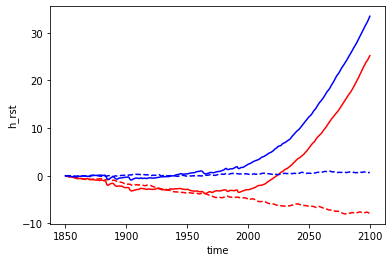

In [10]:
h_rst_gl_av_TH = ds_hst_TH.h_rst.weighted(ds_t12.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CH = ds_hst_CH.h_rst.weighted(ds_t12.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_TL = ds_hst_TL.h_rst.weighted(ds_g16.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CL = ds_hst_CL.h_rst.weighted(ds_g16.TAREA).mean(("nlon", "nlat")).compute()

h_rst_gl_a_TH = h_rst_gl_av_TH - h_rst_gl_av_TH.isel(time=0) # a: anomaly
# h_rst_gl_a_TH = h_rst_gl_a_TH.where(h_rst_gl_a_TH<50, np.nan) # mask spikes as nan
# h_rst_gl_a_TH = h_rst_gl_a_TH.interpolate_na(dim="time", method="linear") # fn: fill nan
# fill nan with linear interpolation 
h_rst_gl_a_CH = h_rst_gl_av_CH - h_rst_gl_av_CH.isel(time=0)
h_rst_gl_a_TL = h_rst_gl_av_TL - h_rst_gl_av_TL.isel(time=0) # a: anomaly
h_rst_gl_a_CL = h_rst_gl_av_CL - h_rst_gl_av_CL.isel(time=0) # a: anomaly

h_rst_gl_a_TH.plot(color='r')
h_rst_gl_a_CH.plot(color='r',linestyle='dashed')
h_rst_gl_a_TL.plot(color='b')
h_rst_gl_a_CL.plot(color='b',linestyle='dashed')

In [11]:
print(ds_ssh_TL.time)
ssh_r_TL = ds_ssh_TL.SSH.isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()
ssh_r_CL = ds_ssh_CL.SSH.isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()
ssh_r_TLmCL = (ssh_r_TL-ssh_r_CL)

print(ds_ssh_TH.time)
ssh_r_TH = ds_ssh_TH.SSH.where(ds0_HR.KMT>0, np.nan).isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12)).compute()
ssh_r_CH = ds_ssh_CH.SSH.where(ds0_HR.KMT>0, np.nan).isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12)).compute()
ssh_r_THmCH = (ssh_r_TH-ssh_r_CH)
ssh_r_THmCH

<xarray.DataArray 'time' (time: 251)>
array([1850, 1851, 1852, ..., 2098, 2099, 2100])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
<xarray.DataArray 'time' (time: 251)>
array([1850, 1851, 1852, ..., 2098, 2099, 2100])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100


<xarray.DataArray 'SSH' (time: 251, nlat: 700, nlon: 500)>
array([[[ 3.9685326 ,  3.9020042 ,  3.7885551 , ...,  0.17214394,
          0.11720085,  0.0576582 ],
        [ 4.1258774 ,  4.02792   ,  3.9046059 , ...,  0.26916218,
          0.19370556,  0.15141392],
        [ 4.2093964 ,  4.1170883 ,  3.9538918 , ...,  0.3644371 ,
          0.306345  ,  0.24437237],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.6152267 ,  1.6442146 ,  1.6581764 , ...,  1.0519571 ,
          1.0212955 ,  0.9933739 ],
        [ 1.8165398 ,  1.8557777 ,  1.8644333 , ...,  0.9922085 ,
          0.96777725,  0.9288826 ],
        [ 2.0242271 ,  2.0684586 ,  2.0779037 , ...,  0.9488478 ,
          0.91304874,  0.8823843 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.0349846 ,  1.1294022 ,  1.1500397 , ..., -3.2766848 ,
         -3.2118587 , -3.179905  ],
        [ 0.75706863,  0.8204918 ,  0.91560364, ..., -3.434104  ,
         -3.4202566 , -3.3230972 ],
        [ 0.41760254,  0.55298233,  0.59820175, ..., -3.597808  ,
         -3.517725  , -3.4711561 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 270.1 270.1 270.2 270.4 ... -1.0 -1.0 -1.0
    TLAT     (nlat, nlon) float64 11.77 11.77 11.77 11.77 ... -1.0 -1.0 -1.0
    ULONG    (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 11.82 11.82 11.82 11.82 ... -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

In [12]:
hst_TLmCL = (ds_hst_TL.h_rst - h_rst_gl_av_TL) - (ds_hst_CL.h_rst - h_rst_gl_av_CL) # hst: steric height
hst_r_TLmCL = hst_TLmCL.isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16), nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()

hst_THmCH = (ds_hst_TH.h_rst - h_rst_gl_av_TH) - (ds_hst_CH.h_rst.compute() - h_rst_gl_av_CH)
hst_r_THmCH = hst_THmCH.isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12))
hst_r_THmCH

<xarray.DataArray 'h_rst' (time: 251, nlat: 700, nlon: 500)>
array([[[ 3.77563445,  3.71383589,  3.62942986, ...,  0.24160644,
          0.20240293,  0.17523393],
        [ 3.93548023,  3.8499399 ,  3.7406617 , ...,  0.28665898,
          0.27472667,  0.22091637],
        [ 4.03793726,  3.93263553,  3.79785381, ...,  0.34463246,
          0.31782314,  0.2616873 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.58926265,  1.62953401,  1.65437106, ...,  0.81861897,
          0.71155773,  0.70693621],
        [ 1.83459775,  1.88431992,  1.9179    , ...,  0.70200969,
          0.72445881,  0.63199428],
        [ 2.07305752,  2.13488487,  2.14372316, ...,  0.66605157,
          0.61912677,  0.58528599],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.75641616,  1.80566177,  1.88150974, ...,  1.69227674,
          1.5020971 ,  1.54930098],
        [ 1.59706173,  1.72049439,  1.82331952, ...,  1.08108959,
          1.12883634,  1.29798907],
        [ 1.47422731,  1.61660216,  1.72071113, ...,  0.99138454,
          1.06543364,  1.34256789],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

In [13]:
hm_r_TLmCL = ssh_r_TLmCL - hst_r_TLmCL # hm: sea level (h) due to mass (m) transport from 1850-2100
hm_r_THmCH = ssh_r_THmCH - hst_r_THmCH
hm_r_THmCH

<xarray.DataArray (time: 251, nlat: 700, nlon: 500)>
array([[[ 1.92898110e-01,  1.88168355e-01,  1.59125287e-01, ...,
         -6.94625029e-02, -8.52020818e-02, -1.17575731e-01],
        [ 1.90397154e-01,  1.77979866e-01,  1.63944170e-01, ...,
         -1.74968046e-02, -8.10211123e-02, -6.95024540e-02],
        [ 1.71459101e-01,  1.84452790e-01,  1.56037946e-01, ...,
          1.98046431e-02, -1.14781514e-02, -1.73149368e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 2.59640923e-02,  1.46806168e-02,  3.80535905e-03, ...,
          2.33338159e-01,  3.09737817e-01,  2.86437661e-01],
        [-1.80579835e-02, -2.85421826e-02, -5.34667085e-02, ...,
          2.90198789e-01,  2.43318440e-01,  2.96888316e-01],
        [-4.88303756e-02, -6.64263167e-02, -6.58194077e-02, ...,
          2.82796198e-01,  2.93921969e-01,  2.97098307e-01],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-7.21431570e-01, -6.76259606e-01, -7.31470063e-01, ...,
         -4.96896150e+00, -4.71395585e+00, -4.72920592e+00],
        [-8.39993099e-01, -9.00002603e-01, -9.07715884e-01, ...,
         -4.51519355e+00, -4.54909295e+00, -4.62108630e+00],
        [-1.05662477e+00, -1.06361983e+00, -1.12250938e+00, ...,
         -4.58919243e+00, -4.58315863e+00, -4.81372401e+00],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 270.1 270.1 270.2 270.4 ... -1.0 -1.0 -1.0
    TLAT     (nlat, nlon) float64 11.77 11.77 11.77 11.77 ... -1.0 -1.0 -1.0
    ULONG    (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 11.82 11.82 11.82 11.82 ... -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

<xarray.DataArray 'SSH' (time: 251, nlat: 700, nlon: 500)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    ULONG    (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 11.82 11.82 11.82 11.82 ... -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

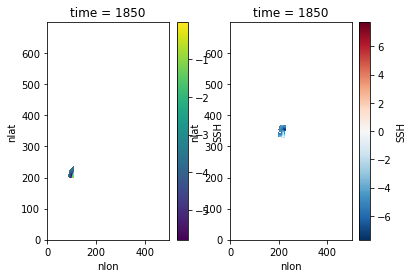

In [14]:
# r1m: region 1 masked
ssh_r1m_THmCH = ssh_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx1+360) & (ds_r_t12.TLONG<lon2_bx1+360) & 
                                    (ds_r_t12.TLAT>lat1_bx1)&(ds_r_t12.TLAT<lat2_bx1)), np.nan)
hst_r1m_THmCH = hst_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx1+360) & (ds_r_t12.TLONG<lon2_bx1+360) & 
                                    (ds_r_t12.TLAT>lat1_bx1)&(ds_r_t12.TLAT<lat2_bx1)), np.nan)
hm_r1m_THmCH = hm_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx1+360) & (ds_r_t12.TLONG<lon2_bx1+360) & 
                                    (ds_r_t12.TLAT>lat1_bx1)&(ds_r_t12.TLAT<lat2_bx1)), np.nan)


ssh_r2m_THmCH = ssh_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx2+360) & (ds_r_t12.TLONG<lon2_bx2+360) & 
                                    (ds_r_t12.TLAT>lat1_bx2)&(ds_r_t12.TLAT<lat2_bx2)), np.nan)
hst_r2m_THmCH = hst_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx2+360) & (ds_r_t12.TLONG<lon2_bx2+360) & 
                                    (ds_r_t12.TLAT>lat1_bx2)&(ds_r_t12.TLAT<lat2_bx2)), np.nan)
hm_r2m_THmCH = hm_r_THmCH.where(((ds_r_t12.TLONG>lon1_bx2+360) & (ds_r_t12.TLONG<lon2_bx2+360) & 
                                    (ds_r_t12.TLAT>lat1_bx2)&(ds_r_t12.TLAT<lat2_bx2)), np.nan)
fig, axs = plt.subplots(1,2)
ssh_r1m_THmCH.isel(time=0).plot(ax=axs[0])
ssh_r2m_THmCH.isel(time=0).plot(ax=axs[1])
ssh_r1m_THmCH

<xarray.DataArray 'SSH' (time: 251, nlat: 120, nlon: 60)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

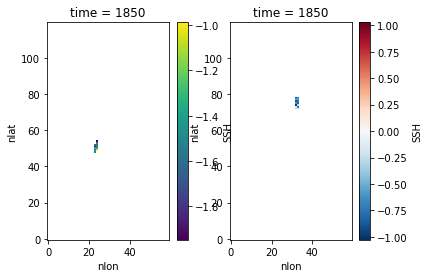

In [15]:
ssh_r1m_TLmCL = ssh_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx1+360) & (ds_r_g16.TLONG<lon2_bx1+360) & 
                                    (ds_r_g16.TLAT>lat1_bx1)&(ds_r_g16.TLAT<lat2_bx1)), np.nan)
hst_r1m_TLmCL = hst_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx1+360) & (ds_r_g16.TLONG<lon2_bx1+360) & 
                                    (ds_r_g16.TLAT>lat1_bx1)&(ds_r_g16.TLAT<lat2_bx1)), np.nan)
hm_r1m_TLmCL = hm_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx1+360) & (ds_r_g16.TLONG<lon2_bx1+360) & 
                                    (ds_r_g16.TLAT>lat1_bx1)&(ds_r_g16.TLAT<lat2_bx1)), np.nan)


ssh_r2m_TLmCL = ssh_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx2+360) & (ds_r_g16.TLONG<lon2_bx2+360) & 
                                    (ds_r_g16.TLAT>lat1_bx2)&(ds_r_g16.TLAT<lat2_bx2)), np.nan)
hst_r2m_TLmCL = hst_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx2+360) & (ds_r_g16.TLONG<lon2_bx2+360) & 
                                    (ds_r_g16.TLAT>lat1_bx2)&(ds_r_g16.TLAT<lat2_bx2)), np.nan)
hm_r2m_TLmCL = hm_r_TLmCL.where(((ds_r_g16.TLONG>lon1_bx2+360) & (ds_r_g16.TLONG<lon2_bx2+360) & 
                                    (ds_r_g16.TLAT>lat1_bx2)&(ds_r_g16.TLAT<lat2_bx2)), np.nan)
fig, axs = plt.subplots(1,2)
ssh_r1m_TLmCL.isel(time=0).plot(ax=axs[0])
ssh_r2m_TLmCL.isel(time=0).plot(ax=axs[1])
ssh_r1m_TLmCL

In [16]:
ssh_r1mav_TLmCL = ssh_r1m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))
hst_r1mav_TLmCL = hst_r1m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))
hm_r1mav_TLmCL = hm_r1m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))

ssh_r1mav_THmCH = ssh_r1m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))
hst_r1mav_THmCH = hst_r1m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))
hm_r1mav_THmCH = hm_r1m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))

ssh_r2mav_TLmCL = ssh_r2m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))
hst_r2mav_TLmCL = hst_r2m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))
hm_r2mav_TLmCL = hm_r2m_TLmCL.weighted(ds_r_g16.TAREA).mean(('nlon','nlat'))

ssh_r2mav_THmCH = ssh_r2m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))
hst_r2mav_THmCH = hst_r2m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))
hm_r2mav_THmCH = hm_r2m_THmCH.weighted(ds_r_t12.TAREA).mean(('nlon','nlat'))
hm_r2mav_THmCH 

<xarray.DataArray (time: 251)>
array([-3.10118420e+00, -6.42876594e-01, -3.89561655e-01, -1.09196086e+00,
        3.39123836e-01,  2.11197338e+00, -1.20718300e+00, -6.76999693e-01,
       -2.70769519e-01,  1.49690403e+00,  2.07031003e+00,  8.12886347e-01,
        1.23909341e+00,  9.14781820e-01, -1.27125516e+00, -2.19266172e+00,
       -3.90571825e+00, -2.84888451e+00, -5.21410305e+00, -3.42009393e-01,
        1.14279625e+00, -1.41512465e-01,  4.30137916e-01, -2.88139883e+00,
       -2.79247938e-01, -1.50012644e-01,  1.95323981e+00,  3.73701049e+00,
        6.69843533e-01, -1.73186231e+00, -4.37230673e-01,  1.36447728e+00,
       -2.13395504e-01,  9.83905286e-01,  2.21575932e+00,  1.55384138e+00,
        5.20620648e-01,  2.54791511e+00,  1.85431422e+00, -2.41725471e-01,
       -4.85122560e-01,  1.75590448e+00,  9.67397196e-01,  7.55636730e-01,
        1.16918087e+00, -8.89371079e-01, -3.37288459e+00, -1.32783895e+00,
       -9.01853021e-01,  1.78834261e+00, -2.33226330e+00,  2.02794268e+00,
       -7.42717903e-01, -1.32162277e-01,  1.20158327e+00, -1.75397364e+00,
        3.26837807e-01, -7.94680930e-01, -1.99775826e+00, -8.69263428e-01,
        2.74825449e-01, -3.80383326e-01, -6.56230451e-01,  6.37483400e-01,
       -2.47878743e+00, -2.25916118e-01, -2.24875859e+00, -1.74008430e+00,
        2.74528887e+00,  2.96420354e+00,  2.64998569e+00,  2.56649498e+00,
        1.78054803e+00,  2.59101390e+00,  2.41966835e+00,  1.76189571e+00,
        2.93048683e+00,  2.43640201e+00,  1.57787862e+00, -1.85562338e+00,
...
        3.82352828e+00,  4.58386454e+00,  3.35855188e+00,  4.81870197e+00,
        5.35745856e+00,  5.72417524e+00,  3.68788575e+00,  8.30771774e+00,
        4.95062404e+00,  8.29567357e+00,  7.74302010e+00,  5.70348369e+00,
        6.63772572e+00,  9.96212833e+00,  7.43765341e+00,  1.19582614e+01,
        1.24215582e+01,  1.16487666e+01,  1.39232447e+01,  1.43294379e+01,
        1.43508522e+01,  1.47735699e+01,  1.36336306e+01,  1.50882707e+01,
        1.46742970e+01,  1.47847307e+01,  1.38654655e+01,  1.66002311e+01,
        1.63761110e+01,  1.73647226e+01,  2.11707083e+01,  1.53082802e+01,
        1.59467547e+01,  1.55236570e+01,  1.64269964e+01,  1.83296674e+01,
        2.16133005e+01,  1.90257050e+01,  2.17284771e+01,  1.98750042e+01,
        1.88408978e+01,  2.08080210e+01,  2.30809774e+01,  2.02559801e+01,
        1.89097442e+01,  1.82884517e+01,  1.97206617e+01,  2.20311996e+01,
        2.09418966e+01,  2.18795700e+01,  2.60645327e+01,  2.69698549e+01,
        2.68089905e+01,  2.46457505e+01,  2.66486458e+01,  2.69198604e+01,
        2.49137373e+01,  2.70362492e+01,  2.75890390e+01,  2.74475467e+01,
        2.75869216e+01,  2.98838178e+01,  3.14931795e+01,  3.12228792e+01,
        3.04314181e+01,  3.10788791e+01,  3.35618739e+01,  3.48893086e+01,
        3.41038092e+01,  3.35784696e+01,  3.80553614e+01,  3.91783899e+01,
        3.70215188e+01,  3.52919919e+01,  3.37469333e+01,  3.82792278e+01,
        3.64389486e+01,  3.51757413e+01,  3.74953502e+01])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100

In [17]:
# weight_ssh_obs = np.cos(np.deg2rad(ds_ssh_obs.latitude))
# weight_ssh_obs.name = "weight_ssh_obs"
# ssh_gl_av_obs = ds_ssh_obs.adt.weighted(weight_ssh_obs).mean(("longitude", "latitude")) # unit: m
# ssh_gl_av_obs.plot()
# # ssh_gl_av_tr_obs, _, _, p_gl_av_obs, _ = stats.linregress(time1_yr_ssh, ssh_gl_av_obs)
# # print(ssh_gl_av_tr_obs*1000, p_gl_av_obs)
# ssh_gl_av_obs

In [18]:
# ssha_obs = ds_ssh_obs.adt - ssh_gl_av_obs
# # ssha_r_obs = ssha_obs.sel(latitude=slice(lat1_r, lat2_r), longitude=slice(lon1_r+360, lon2_r+360))
# # ssh_obs = ds_ssh_obs.adt
# # ssha_r_obs

# ssha_r1_obs = ssha_obs.where(((ssha_obs.longitude>lon1_bx1+360) & (ssha_obs.longitude<lon2_bx1+360) & 
#                               (ssha_obs.latitude>lat1_bx1)&(ssha_obs.latitude<lat2_bx1)), drop=True)
# ssha_r1_obs.isel(time=0).plot()
# ssha_r1_obs

In [19]:
# ssha_r2_obs = ssha_obs.where(((ssha_obs.longitude>lon1_bx2+360) & (ssha_obs.longitude<lon2_bx2+360) & 
#                               (ssha_obs.latitude>lat1_bx2)&(ssha_obs.latitude<lat2_bx2)), drop=True)
# ssha_r2_obs.isel(time=0).plot()
# # ssha_r2mav_obs = ssha_r2_obs.weighted()# 
# ssha_r2_obs

In [20]:
# weight_r1_obs = np.cos(np.deg2rad(ssha_r1_obs.latitude))
# weight_r1_obs.name = "weight_ssh_obs"
# ssha_r1mav_obs = ssha_r1_obs.weighted(weight_r1_obs).mean(("longitude", "latitude")) # unit: m, mav: masked average

# weight_r2_obs = np.cos(np.deg2rad(ssha_r2_obs.latitude))
# weight_r2_obs.name = "weight_ssh_obs"
# ssha_r2mav_obs = ssha_r2_obs.weighted(weight_r2_obs).mean(("longitude", "latitude")) # unit: m, mav: masked average
# ssha_r2mav_obs.plot()
# ssha_r2mav_obs

# make pics

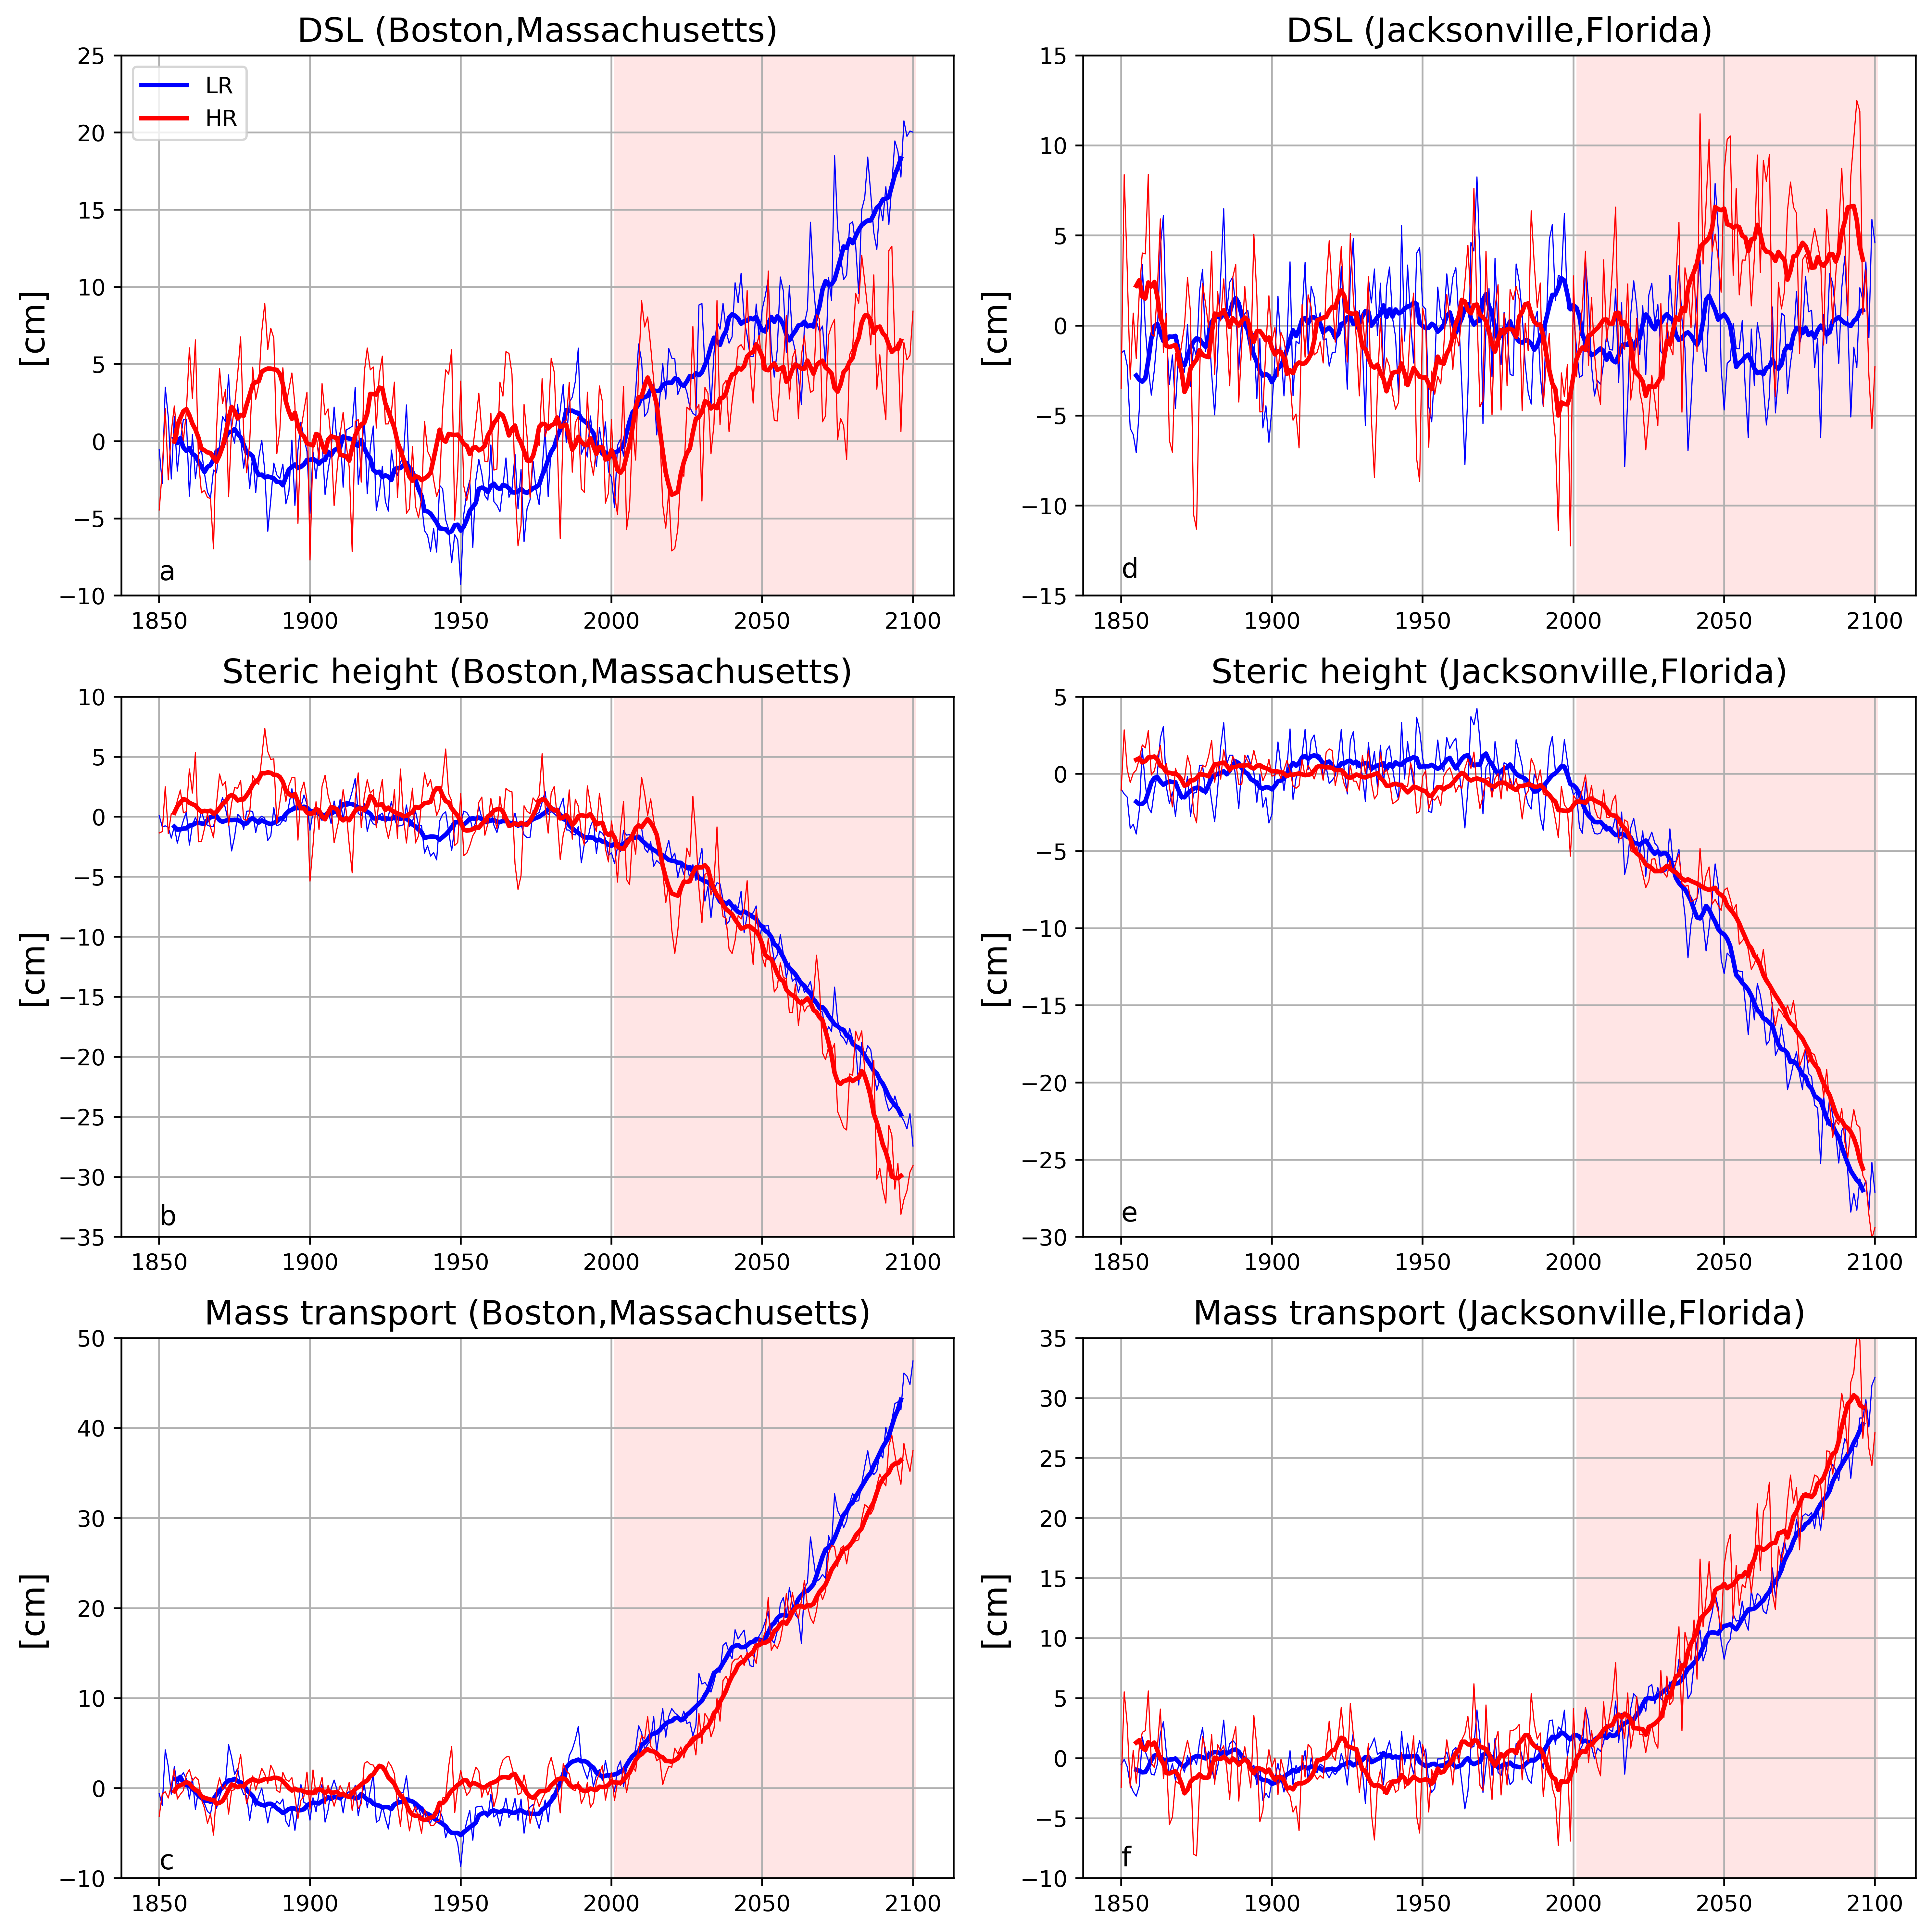

In [21]:
fig1, axs = plt.subplots(3,2,figsize=(12, 12), dpi=500)

axs[0,0].plot(ssh_r2mav_TLmCL.time, ssh_r2mav_TLmCL, 
              color='b', linewidth=0.5)
axs[0,0].plot(ssh_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2, label='LR')
axs[0,0].plot(ssh_r2mav_THmCH.time, ssh_r2mav_THmCH, 
              color='r', linewidth=0.5)
axs[0,0].plot(ssh_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2, label='HR')
axs[0,0].legend(loc="upper left", frameon=True)
# axs[0,0].set_xlim([1840,2110])
axs[0,0].set_ylim([-10,25])
axs[0,0].set_ylabel('[cm]', fontsize=15)
axs[0,0].set_title('DSL (Boston,Massachusetts)', fontsize=15)
axs[0,0].grid()
axs[0,0].text(1850, -9, 'a', fontsize=12)
# axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,0].fill_between([2001,2100+1], [-10,-10], [25,25], 
                facecolor='r', alpha=0.1)


axs[1,0].plot(hst_r2mav_TLmCL.time, hst_r2mav_TLmCL, 
              color='b', linewidth=0.5)
axs[1,0].plot(hst_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hst_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[1,0].plot(hst_r2mav_THmCH.time, hst_r2mav_THmCH, 
              color='r', linewidth=0.5)
axs[1,0].plot(hst_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              hst_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
# axs[1,0].set_xlim([1840,2110])
axs[1,0].set_ylim([-35,10])
axs[1,0].set_ylabel('[cm]', fontsize=15)
axs[1,0].set_title('Steric height (Boston,Massachusetts)', fontsize=15)
axs[1,0].grid()
axs[1,0].text(1850, -34, 'b', fontsize=12)
# axs[1,0].tick_params(axis='both', which='major', labelsize=12)
axs[1,0].fill_between([2001,2100+1], [-35,-35], [10,10], 
                facecolor='r', alpha=0.1)

axs[2,0].plot(hm_r2mav_TLmCL.time, hm_r2mav_TLmCL, 
              color='b', linewidth=0.5, label='mass transport')
axs[2,0].plot(hm_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hm_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[2,0].plot(hm_r2mav_THmCH.time, hm_r2mav_THmCH, 
              color='r', linewidth=0.5, label='mass transport')
axs[2,0].plot(hm_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              hm_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
# axs[2,0].set_xlim([1840,2110])
axs[2,0].set_ylim([-10,50])
axs[2,0].set_ylabel('[cm]', fontsize=15)
axs[2,0].set_title('Mass transport (Boston,Massachusetts)', fontsize=15)
axs[2,0].grid()
axs[2,0].text(1850, -9, 'c', fontsize=12)
# axs[2,0].tick_params(axis='both', which='major', labelsize=12)
axs[2,0].fill_between([2001,2100+1], [-10,-10], [50,50], 
                facecolor='r', alpha=0.1)


axs[0,1].plot(ssh_r1mav_TLmCL.time, ssh_r1mav_TLmCL, 
              color='b', linewidth=0.5, label='LR' )
axs[0,1].plot(ssh_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[0,1].plot(ssh_r1mav_THmCH.time, ssh_r1mav_THmCH, 
              color='r', linewidth=0.5, label='HR' )
axs[0,1].plot(ssh_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
# axs[0,1].legend(loc="upper left", frameon=True)
# axs[0,1].set_xlim([1840,2110])
axs[0,1].set_ylim([-15,15])
axs[0,1].set_ylabel('[cm]', fontsize=15)
axs[0,1].set_title('DSL (Jacksonville,Florida)', fontsize=15)
axs[0,1].grid()
axs[0,1].text(1850, -14, 'd', fontsize=12)
# axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,1].fill_between([2001,2100+1], [-15,-15], [15,15], 
                facecolor='r', alpha=0.1)

axs[1,1].plot(hst_r1mav_TLmCL.time, hst_r1mav_TLmCL, 
              color='b', linewidth=0.5)
axs[1,1].plot(hst_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hst_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[1,1].plot(hst_r1mav_THmCH.time, hst_r1mav_THmCH, 
              color='r', linewidth=0.5)
axs[1,1].plot(hst_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              hst_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
# axs[1,1].legend(loc="upper left", frameon=True)
# axs[1,1].set_xlim([1840,2110])
axs[1,1].set_ylim([-30,5])
axs[1,1].set_ylabel('[cm]', fontsize=15)
axs[1,1].set_title('Steric height (Jacksonville,Florida)', fontsize=15)
axs[1,1].grid()
axs[1,1].text(1850, -29, 'e', fontsize=12)
# axs[1,0].tick_params(axis='both', which='major', labelsize=12)
axs[1,1].fill_between([2001,2100+1], [-30,-30], [5,5], 
                facecolor='r', alpha=0.1)

axs[2,1].plot(hm_r1mav_TLmCL.time, hm_r1mav_TLmCL, 
              color='b', linewidth=0.5, label='mass transport')
axs[2,1].plot(hm_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hm_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[2,1].plot(hm_r1mav_THmCH.time, hm_r1mav_THmCH, 
              color='r', linewidth=0.5, label='mass transport')
axs[2,1].plot(hm_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              hm_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
# axs[2,1].legend(loc="upper left", frameon=True)
# axs[2,1].set_xlim([1840,2110])
axs[2,1].set_ylim([-10,35])
axs[2,1].set_ylabel('[cm]', fontsize=15)
axs[2,1].set_title('Mass transport (Jacksonville,Florida)', fontsize=15)
axs[2,1].grid()
axs[2,1].text(1850, -9, 'f', fontsize=12)
# axs[2,0].tick_params(axis='both', which='major', labelsize=12)
axs[2,1].fill_between([2001,2100+1], [-10,-10], [35,35], 
                facecolor='r', alpha=0.1)


fig1.tight_layout()

fig1.savefig(pic1,bbox_inches='tight')

In [22]:
# compute linear regression slope and 95% confidence interval 
# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

x = ssh_r1mav_THmCH.time.sel(time=slice('2001','2100'))
print(x)
ts = tinv(0.05, len(x)-2)  
                             
res_ssh_r1mav_THmCH = stats.linregress(x, ssh_r1mav_THmCH.sel(time=slice('2001','2100'))*10) # unit: mm/yr
res_hst_r1mav_THmCH = stats.linregress(x, hst_r1mav_THmCH.sel(time=slice('2001','2100'))*10) 
res_hm_r1mav_THmCH = stats.linregress(x, hm_r1mav_THmCH.sel(time=slice('2001','2100'))*10) 

res_ssh_r1mav_TLmCL = stats.linregress(x, ssh_r1mav_TLmCL.sel(time=slice('2001','2100'))*10) 
res_hst_r1mav_TLmCL = stats.linregress(x, hst_r1mav_TLmCL.sel(time=slice('2001','2100'))*10) 
res_hm_r1mav_TLmCL = stats.linregress(x, hm_r1mav_TLmCL.sel(time=slice('2001','2100'))*10)                              

                             
res_ssh_r2mav_THmCH = stats.linregress(x, ssh_r2mav_THmCH.sel(time=slice('2001','2100'))*10) 
res_hst_r2mav_THmCH = stats.linregress(x, hst_r2mav_THmCH.sel(time=slice('2001','2100'))*10) 
res_hm_r2mav_THmCH = stats.linregress(x, hm_r2mav_THmCH.sel(time=slice('2001','2100'))*10) 

res_ssh_r2mav_TLmCL = stats.linregress(x, ssh_r2mav_TLmCL.sel(time=slice('2001','2100'))*10) 
res_hst_r2mav_TLmCL = stats.linregress(x, hst_r2mav_TLmCL.sel(time=slice('2001','2100'))*10) 
res_hm_r2mav_TLmCL = stats.linregress(x, hm_r2mav_TLmCL.sel(time=slice('2001','2100'))*10)  
                             
                             
print(f"SSH r2(northeast coast) THmCH slope in mm/yr (95%): {res_ssh_r2mav_THmCH.slope:.6f} +/- {ts*res_ssh_r2mav_THmCH.stderr:.6f}")
print(f"HST r2(northeast coast) THmCH slope in mm/yr (95%): {res_hst_r2mav_THmCH.slope:.6f} +/- {ts*res_hst_r2mav_THmCH.stderr:.6f}")
print(f"HM r2(northeast coast) THmCH slope in mm/yr (95%): {res_hm_r2mav_THmCH.slope:.6f} +/- {ts*res_hm_r2mav_THmCH.stderr:.6f}")
                             
print(f"SSH r2(northeast coast) TLmCL slope in mm/yr (95%): {res_ssh_r2mav_TLmCL.slope:.6f} +/- {ts*res_ssh_r2mav_TLmCL.stderr:.6f}")
print(f"HST r2(northeast coast) TLmCL slope in mm/yr (95%): {res_hst_r2mav_TLmCL.slope:.6f} +/- {ts*res_hst_r2mav_TLmCL.stderr:.6f}")
print(f"HM r2(northeast coast) TLmCL slope in mm/yr (95%): {res_hm_r2mav_TLmCL.slope:.6f} +/- {ts*res_hm_r2mav_TLmCL.stderr:.6f}")  

print(f"SSH r1(southeast coast) THmCH slope in mm/yr (95%): {res_ssh_r1mav_THmCH.slope:.6f} +/- {ts*res_ssh_r1mav_THmCH.stderr:.6f}")
print(f"HST r1(southeast coast) THmCH slope in mm/yr (95%): {res_hst_r1mav_THmCH.slope:.6f} +/- {ts*res_hst_r1mav_THmCH.stderr:.6f}")
print(f"HM r1(southeast coast) THmCH slope in mm/yr (95%): {res_hm_r1mav_THmCH.slope:.6f} +/- {ts*res_hm_r1mav_THmCH.stderr:.6f}")
                             
print(f"SSH r1(southeast coast) TLmCL slope in mm/yr (95%): {res_ssh_r1mav_TLmCL.slope:.6f} +/- {ts*res_ssh_r1mav_TLmCL.stderr:.6f}")
print(f"HST r1(southeast coast) TLmCL slope in mm/yr (95%): {res_hst_r1mav_TLmCL.slope:.6f} +/- {ts*res_hst_r1mav_TLmCL.stderr:.6f}")
print(f"HM r1(southeast coast) TLmCL slope in mm/yr (95%): {res_hm_r1mav_TLmCL.slope:.6f} +/- {ts*res_hm_r1mav_TLmCL.stderr:.6f}")

<xarray.DataArray 'time' (time: 100)>
array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072,
       2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084,
       2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
       2097, 2098, 2099, 2100])
Coordinates:
  * time     (time) int64 2001 2002 2003 2004 2005 ... 2096 2097 2098 2099 2100
SSH r2(northeast coast) THmCH slope in mm/yr (95%): 0.802788 +/- 0.261942
HST r2(northeast coast) THmCH slope in mm/yr (95%): -3.103798 +/- 0.234250
HM r2(northeast coast) THmCH slope in mm/yr (95%): 3.906

# Appendix

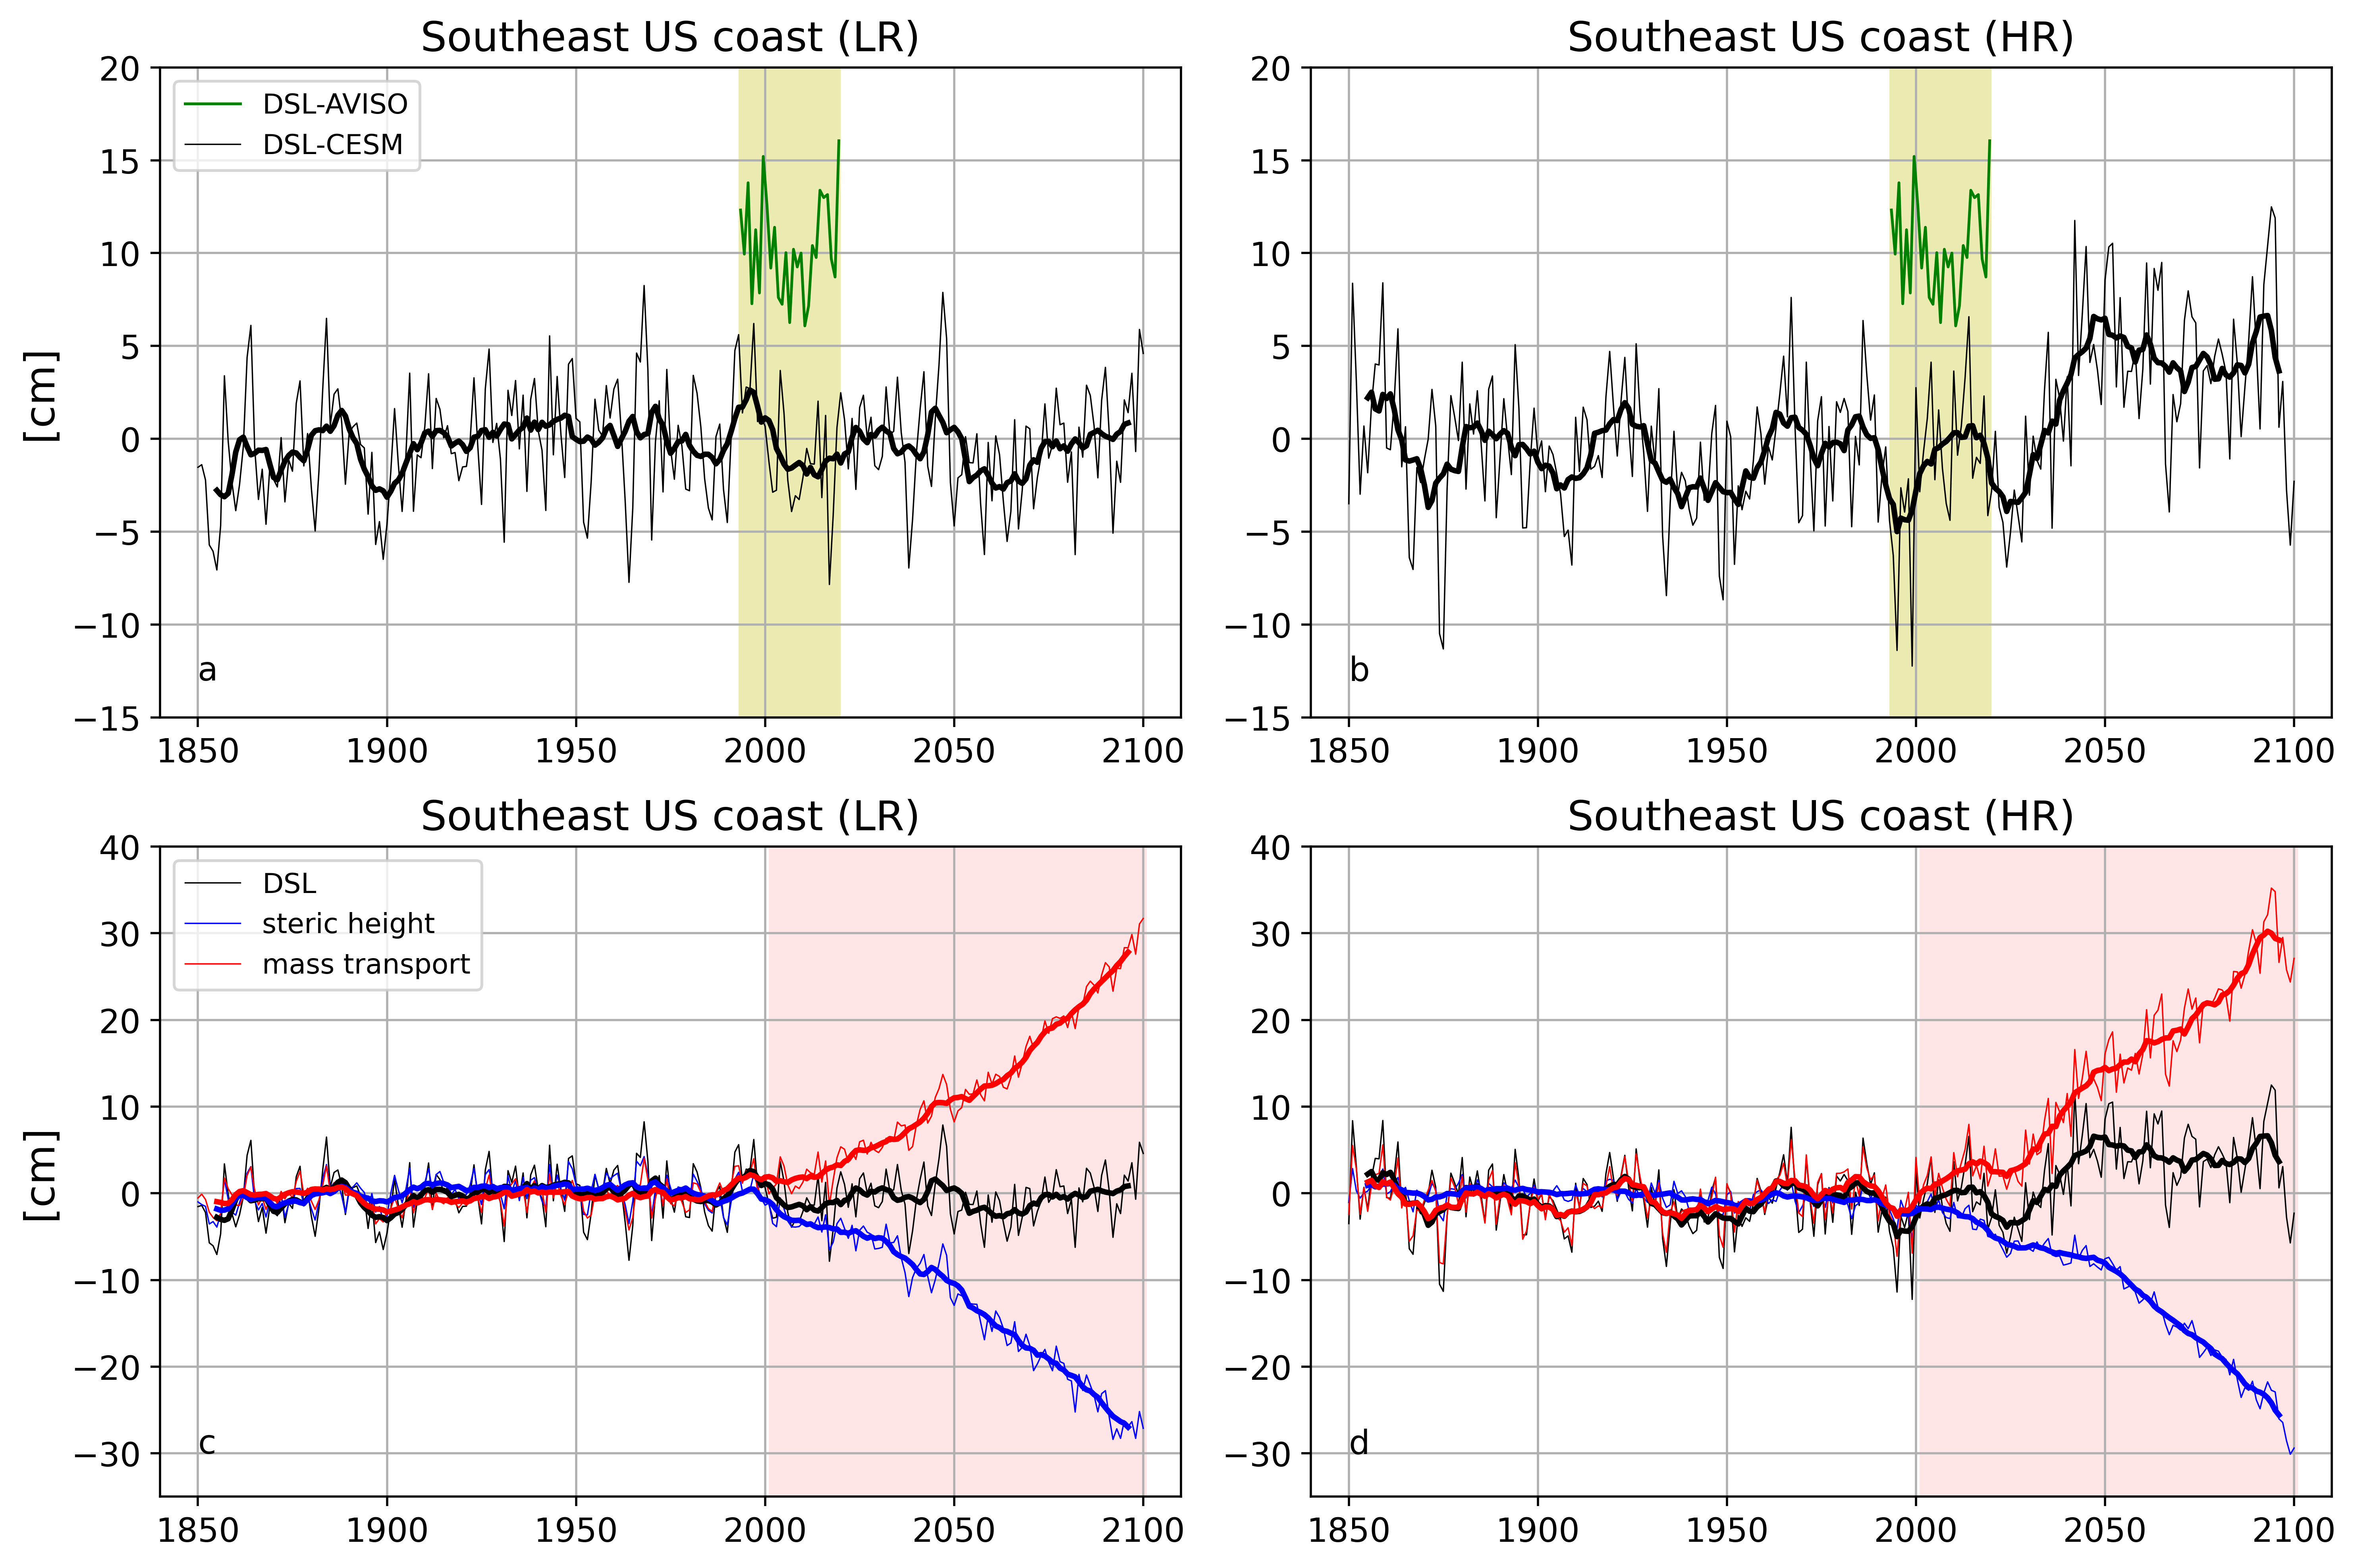

In [21]:
fig1, axs = plt.subplots(2,2,figsize=(12, 8),dpi=500)

axs[0,0].plot(time_obs, ssha_r1mav_obs*100+40, color='g', linewidth=1, label='DSL-AVISO')
axs[0,0].plot(ssh_r1mav_TLmCL.time, ssh_r1mav_TLmCL, 
              color='k', linewidth=0.5, label='DSL-CESM' )
axs[0,0].plot(ssh_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2)
axs[0,0].legend(loc="upper left", frameon=True)
axs[0,0].set_xlim([1840,2110])
axs[0,0].set_ylim([-15,20])
axs[0,0].set_ylabel('[cm]', fontsize=15)
axs[0,0].set_title('Southeast US coast (LR)', fontsize=15)
axs[0,0].grid()
axs[0,0].text(1850, -13, 'a', fontsize=12)
axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,0].fill_between([1993,2019+1], [-60,-60], [60,60], 
                facecolor='y', alpha=0.3)#,where=y < -theta, transform=trans


axs[0,1].plot(time_obs, ssha_r1mav_obs*100+40, color='g', linewidth=1)
axs[0,1].plot(ssh_r1mav_THmCH.time, ssh_r1mav_THmCH, 
              color='k', linewidth=0.5, )
axs[0,1].plot(ssh_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2, label='DSL')
axs[0,1].set_xlim([1840,2110])
axs[0,1].set_ylim([-15,20])
axs[0,1].set_title('Southeast US coast (HR)', fontsize=15)
axs[0,1].grid()
axs[0,1].text(1850, -13, 'b', fontsize=12)
axs[0,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].tick_params(axis='both', which='minor', labelsize=8)
axs[0,1].fill_between([1993,2019+1], [-60,-60], [60,60], 
                facecolor='y', alpha=0.3)


axs[1,0].plot(ssh_r1mav_TLmCL.time, ssh_r1mav_TLmCL, 
              color='k', linewidth=0.5, label='DSL' )
axs[1,0].plot(hst_r1mav_TLmCL.time, hst_r1mav_TLmCL, 
              color='b', linewidth=0.5, label='steric height')
axs[1,0].plot(hm_r1mav_TLmCL.time, hm_r1mav_TLmCL, 
              color='r', linewidth=0.5, label='mass transport')
axs[1,0].plot(ssh_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2)
axs[1,0].plot(hst_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hst_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[1,0].plot(hm_r1mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hm_r1mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
axs[1,0].legend(loc="upper left", frameon=True)
axs[1,0].set_xlim([1840,2110])
axs[1,0].set_ylim([-35,40])
axs[1,0].set_ylabel('[cm]', fontsize=15)
axs[1,0].set_title('Southeast US coast (LR)', fontsize=15)
axs[1,0].grid()
axs[1,0].text(1850, -30, 'c', fontsize=12)
axs[1,0].tick_params(axis='both', which='major', labelsize=12)
axs[1,0].fill_between([2001,2100+1], [-60,-60], [60,60], 
                facecolor='r', alpha=0.1)


axs[1,1].plot(ssh_r1mav_THmCH.time, ssh_r1mav_THmCH, 
              color='k', linewidth=0.5, label='DSL')
axs[1,1].plot(hst_r1mav_THmCH.time, hst_r1mav_THmCH, 
              color='b', linewidth=0.5, label='steric height')
axs[1,1].plot(hm_r1mav_THmCH.time, hm_r1mav_THmCH, 
              color='r', linewidth=0.5, label='mass transport')
axs[1,1].plot(ssh_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2, )
axs[1,1].plot(hst_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              hst_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2, )
axs[1,1].plot(hm_r1mav_THmCH.rolling(time=10, center=True).mean().time, 
              hm_r1mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2, )
axs[1,1].set_xlim([1840,2110])
axs[1,1].set_ylim([-35,40])
axs[1,1].set_title('Southeast US coast (HR)', fontsize=15)
axs[1,1].grid()
axs[1,1].text(1850, -30, 'd', fontsize=12)
axs[1,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].tick_params(axis='both', which='minor', labelsize=8)
axs[1,1].fill_between([2001,2100+1], [-60,-60], [60,60], 
                facecolor='r', alpha=0.1)

fig1.tight_layout()

fig1.savefig(pic1,bbox_inches='tight')

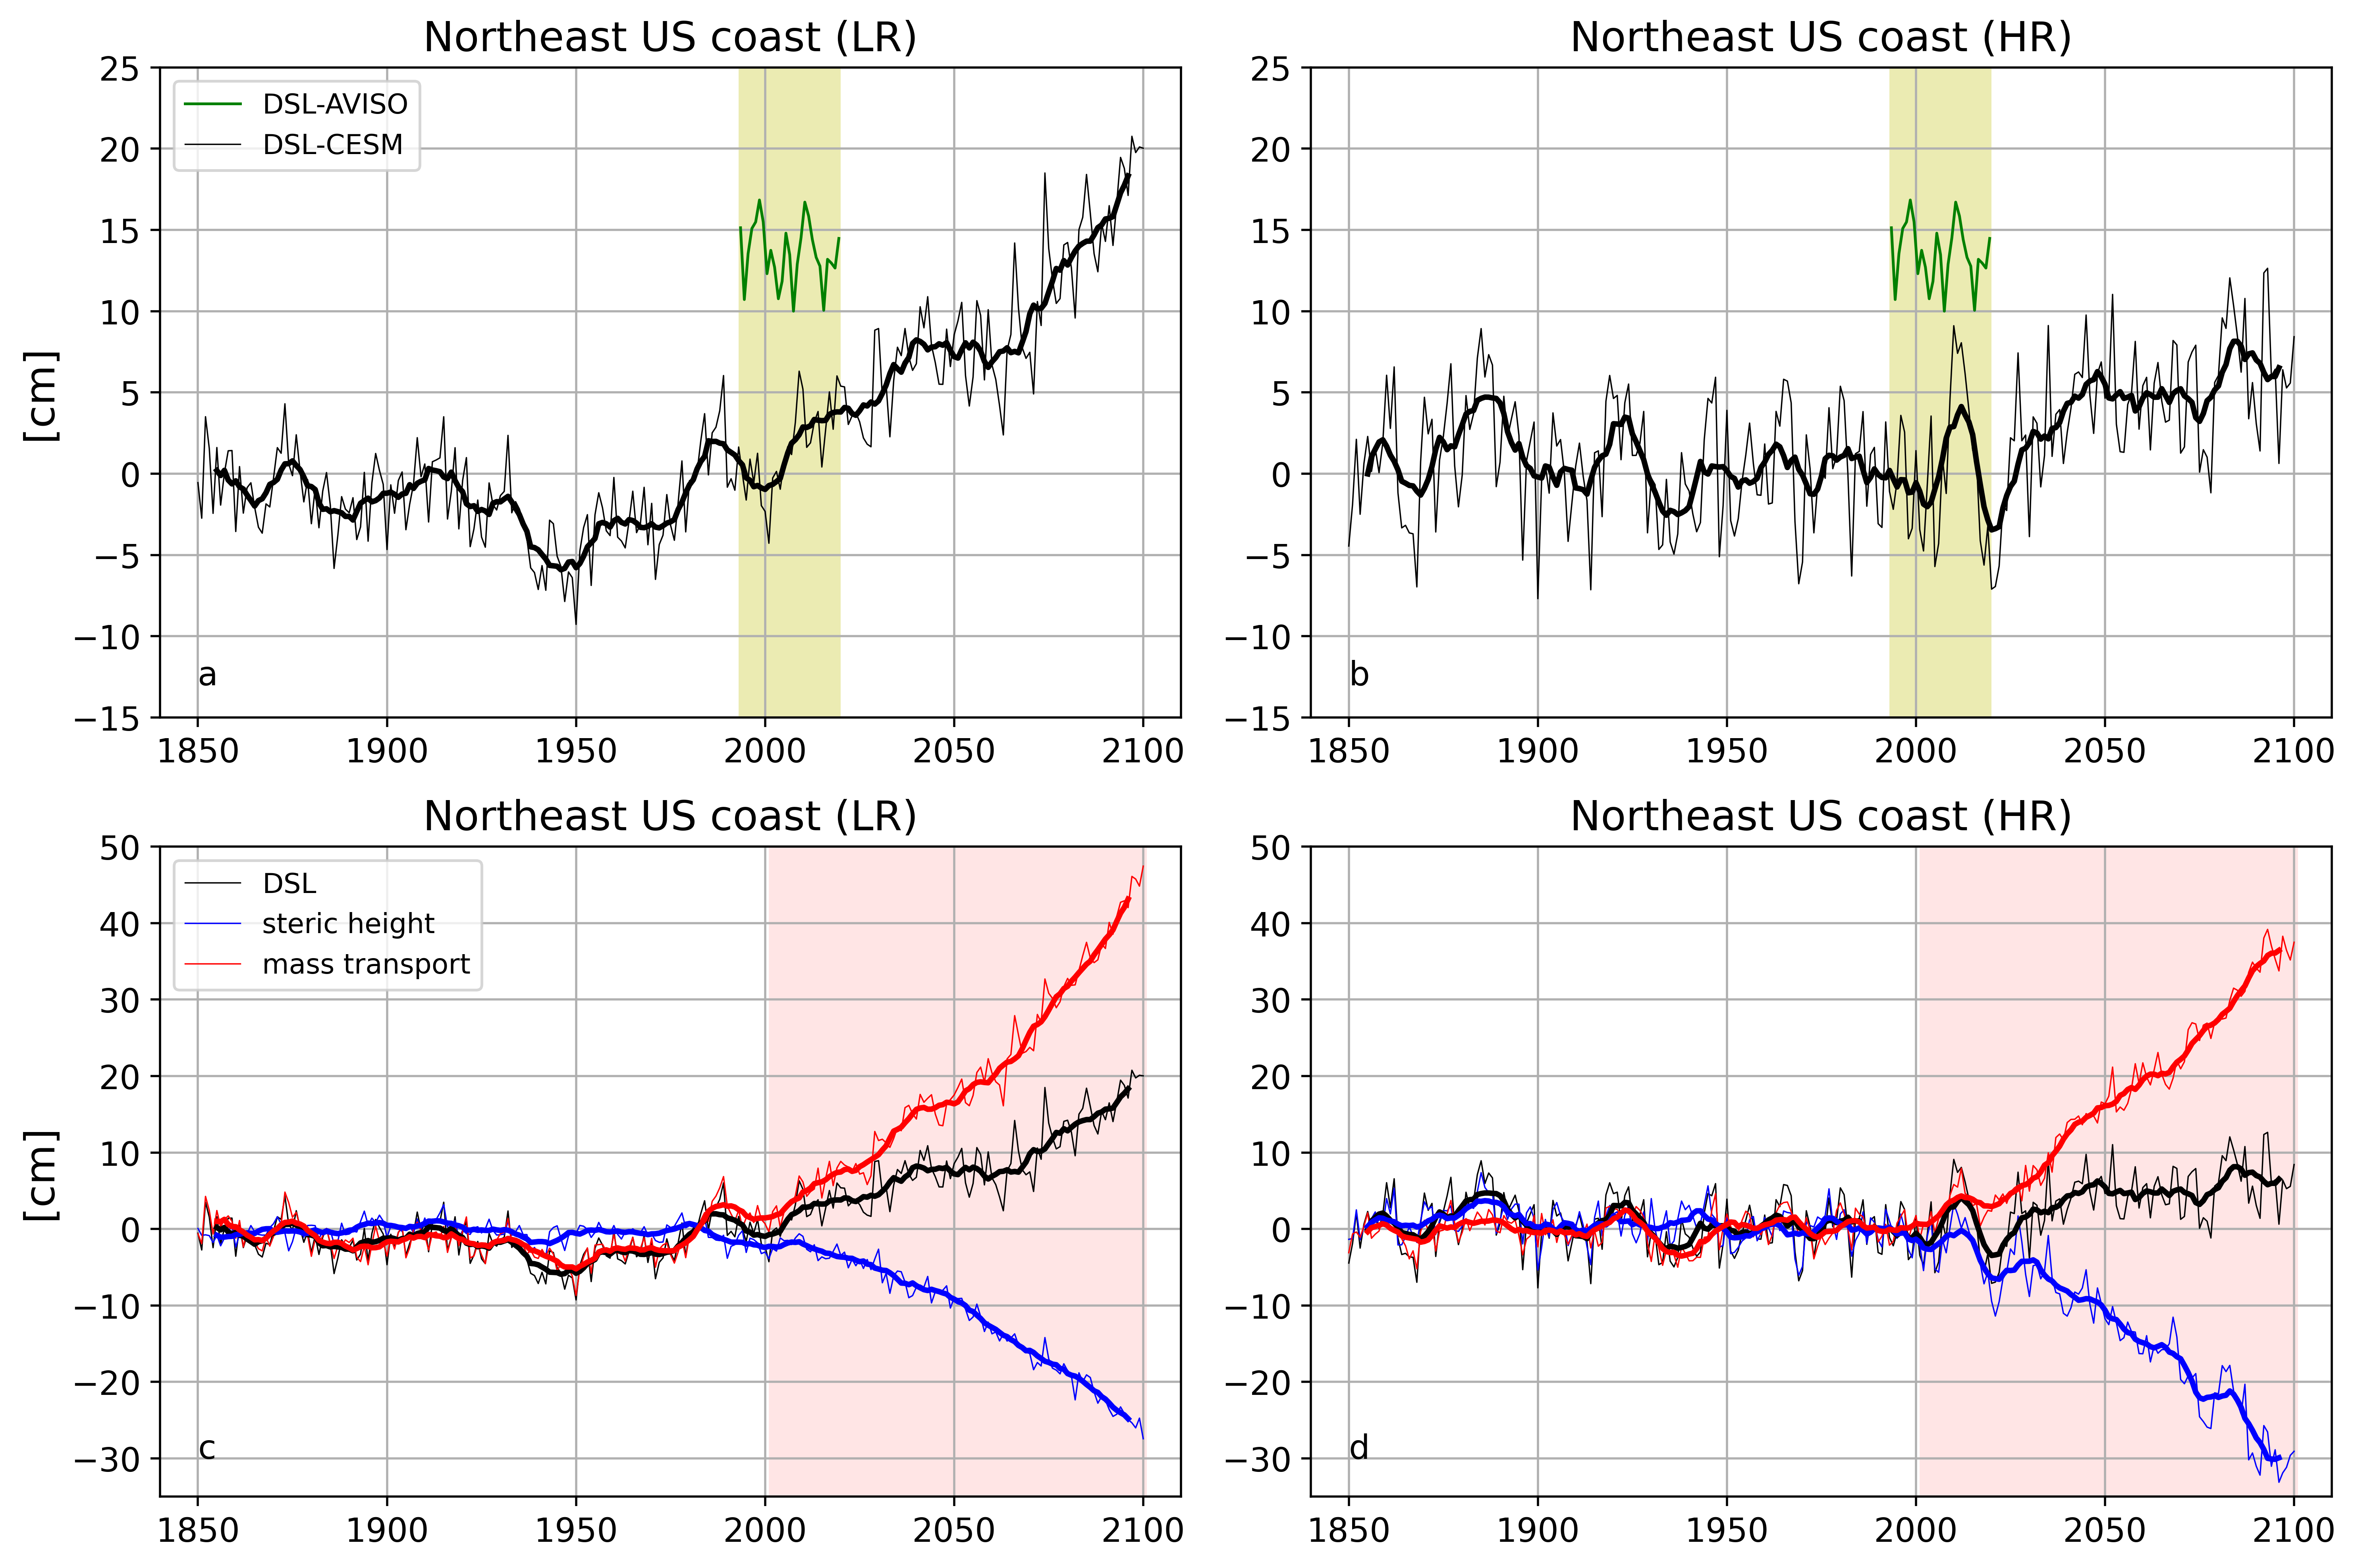

In [22]:
fig2, axs = plt.subplots(2,2,figsize=(12, 8),dpi=500)

axs[0,0].plot(time_obs, ssha_r2mav_obs*100+65, color='g', linewidth=1, label='DSL-AVISO')
axs[0,0].plot(ssh_r2mav_TLmCL.time, ssh_r2mav_TLmCL, 
              color='k', linewidth=0.5, label='DSL-CESM' )
axs[0,0].plot(ssh_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2)
axs[0,0].legend(loc="upper left", frameon=True)
axs[0,0].set_xlim([1840,2110])
axs[0,0].set_ylim([-15,25])
axs[0,0].set_ylabel('[cm]', fontsize=15)
axs[0,0].set_title('Northeast US coast (LR)', fontsize=15)
axs[0,0].grid()
axs[0,0].text(1850, -13, 'a', fontsize=12)
axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,0].fill_between([1993,2019+1], [-60,-60], [60,60], 
                facecolor='y', alpha=0.3)


axs[0,1].plot(time_obs, ssha_r2mav_obs*100+65, color='g', linewidth=1)
axs[0,1].plot(ssh_r2mav_THmCH.time, ssh_r2mav_THmCH, 
              color='k', linewidth=0.5, )
axs[0,1].plot(ssh_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2, label='DSL')
axs[0,1].set_xlim([1840,2110])
axs[0,1].set_ylim([-15,25])
axs[0,1].set_title('Northeast US coast (HR)', fontsize=15)
axs[0,1].grid()
axs[0,1].text(1850, -13, 'b', fontsize=12)
axs[0,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].tick_params(axis='both', which='minor', labelsize=8)
axs[0,1].fill_between([1993,2019+1], [-60,-60], [60,60], 
                facecolor='y', alpha=0.3)


axs[1,0].plot(ssh_r2mav_TLmCL.time, ssh_r2mav_TLmCL, 
              color='k', linewidth=0.5, label='DSL' )
axs[1,0].plot(hst_r2mav_TLmCL.time, hst_r2mav_TLmCL, 
              color='b', linewidth=0.5, label='steric height')
axs[1,0].plot(hm_r2mav_TLmCL.time, hm_r2mav_TLmCL, 
              color='r', linewidth=0.5, label='mass transport')
axs[1,0].plot(ssh_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2)
axs[1,0].plot(hst_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hst_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2)
axs[1,0].plot(hm_r2mav_TLmCL.rolling(time=10, center=True).mean().time, 
              hm_r2mav_TLmCL.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2)
axs[1,0].legend(loc="upper left", frameon=True)
axs[1,0].set_xlim([1840,2110])
axs[1,0].set_ylim([-35,50])
axs[1,0].set_ylabel('[cm]', fontsize=15)
axs[1,0].set_title('Northeast US coast (LR)', fontsize=15)
axs[1,0].grid()
axs[1,0].text(1850, -30, 'c', fontsize=12)
axs[1,0].tick_params(axis='both', which='major', labelsize=12)
axs[1,0].fill_between([2001,2100+1], [-60,-60], [60,60], 
                facecolor='r', alpha=0.1)


axs[1,1].plot(ssh_r2mav_THmCH.time, ssh_r2mav_THmCH, 
              color='k', linewidth=0.5, label='DSL')
axs[1,1].plot(hst_r2mav_THmCH.time, hst_r2mav_THmCH, 
              color='b', linewidth=0.5, label='steric height')
axs[1,1].plot(hm_r2mav_THmCH.time, hm_r2mav_THmCH, 
              color='r', linewidth=0.5, label='mass transport')
axs[1,1].plot(ssh_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              ssh_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='k', linewidth=2, )
axs[1,1].plot(hst_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              hst_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='b', linewidth=2, )
axs[1,1].plot(hm_r2mav_THmCH.rolling(time=10, center=True).mean().time, 
              hm_r2mav_THmCH.rolling(time=10, center=True).mean(), 
              color='r', linewidth=2, )
axs[1,1].set_xlim([1840,2110])
axs[1,1].set_ylim([-35,50])
axs[1,1].set_title('Northeast US coast (HR)', fontsize=15)
axs[1,1].grid()
axs[1,1].text(1850, -30, 'd', fontsize=12)
axs[1,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].tick_params(axis='both', which='minor', labelsize=8)
axs[1,1].fill_between([2001,2100+1], [-60,-60], [60,60], 
                facecolor='r', alpha=0.1)

fig2.tight_layout()

fig2.savefig(pic2, bbox_inches='tight')

(-35.0, 50.0)

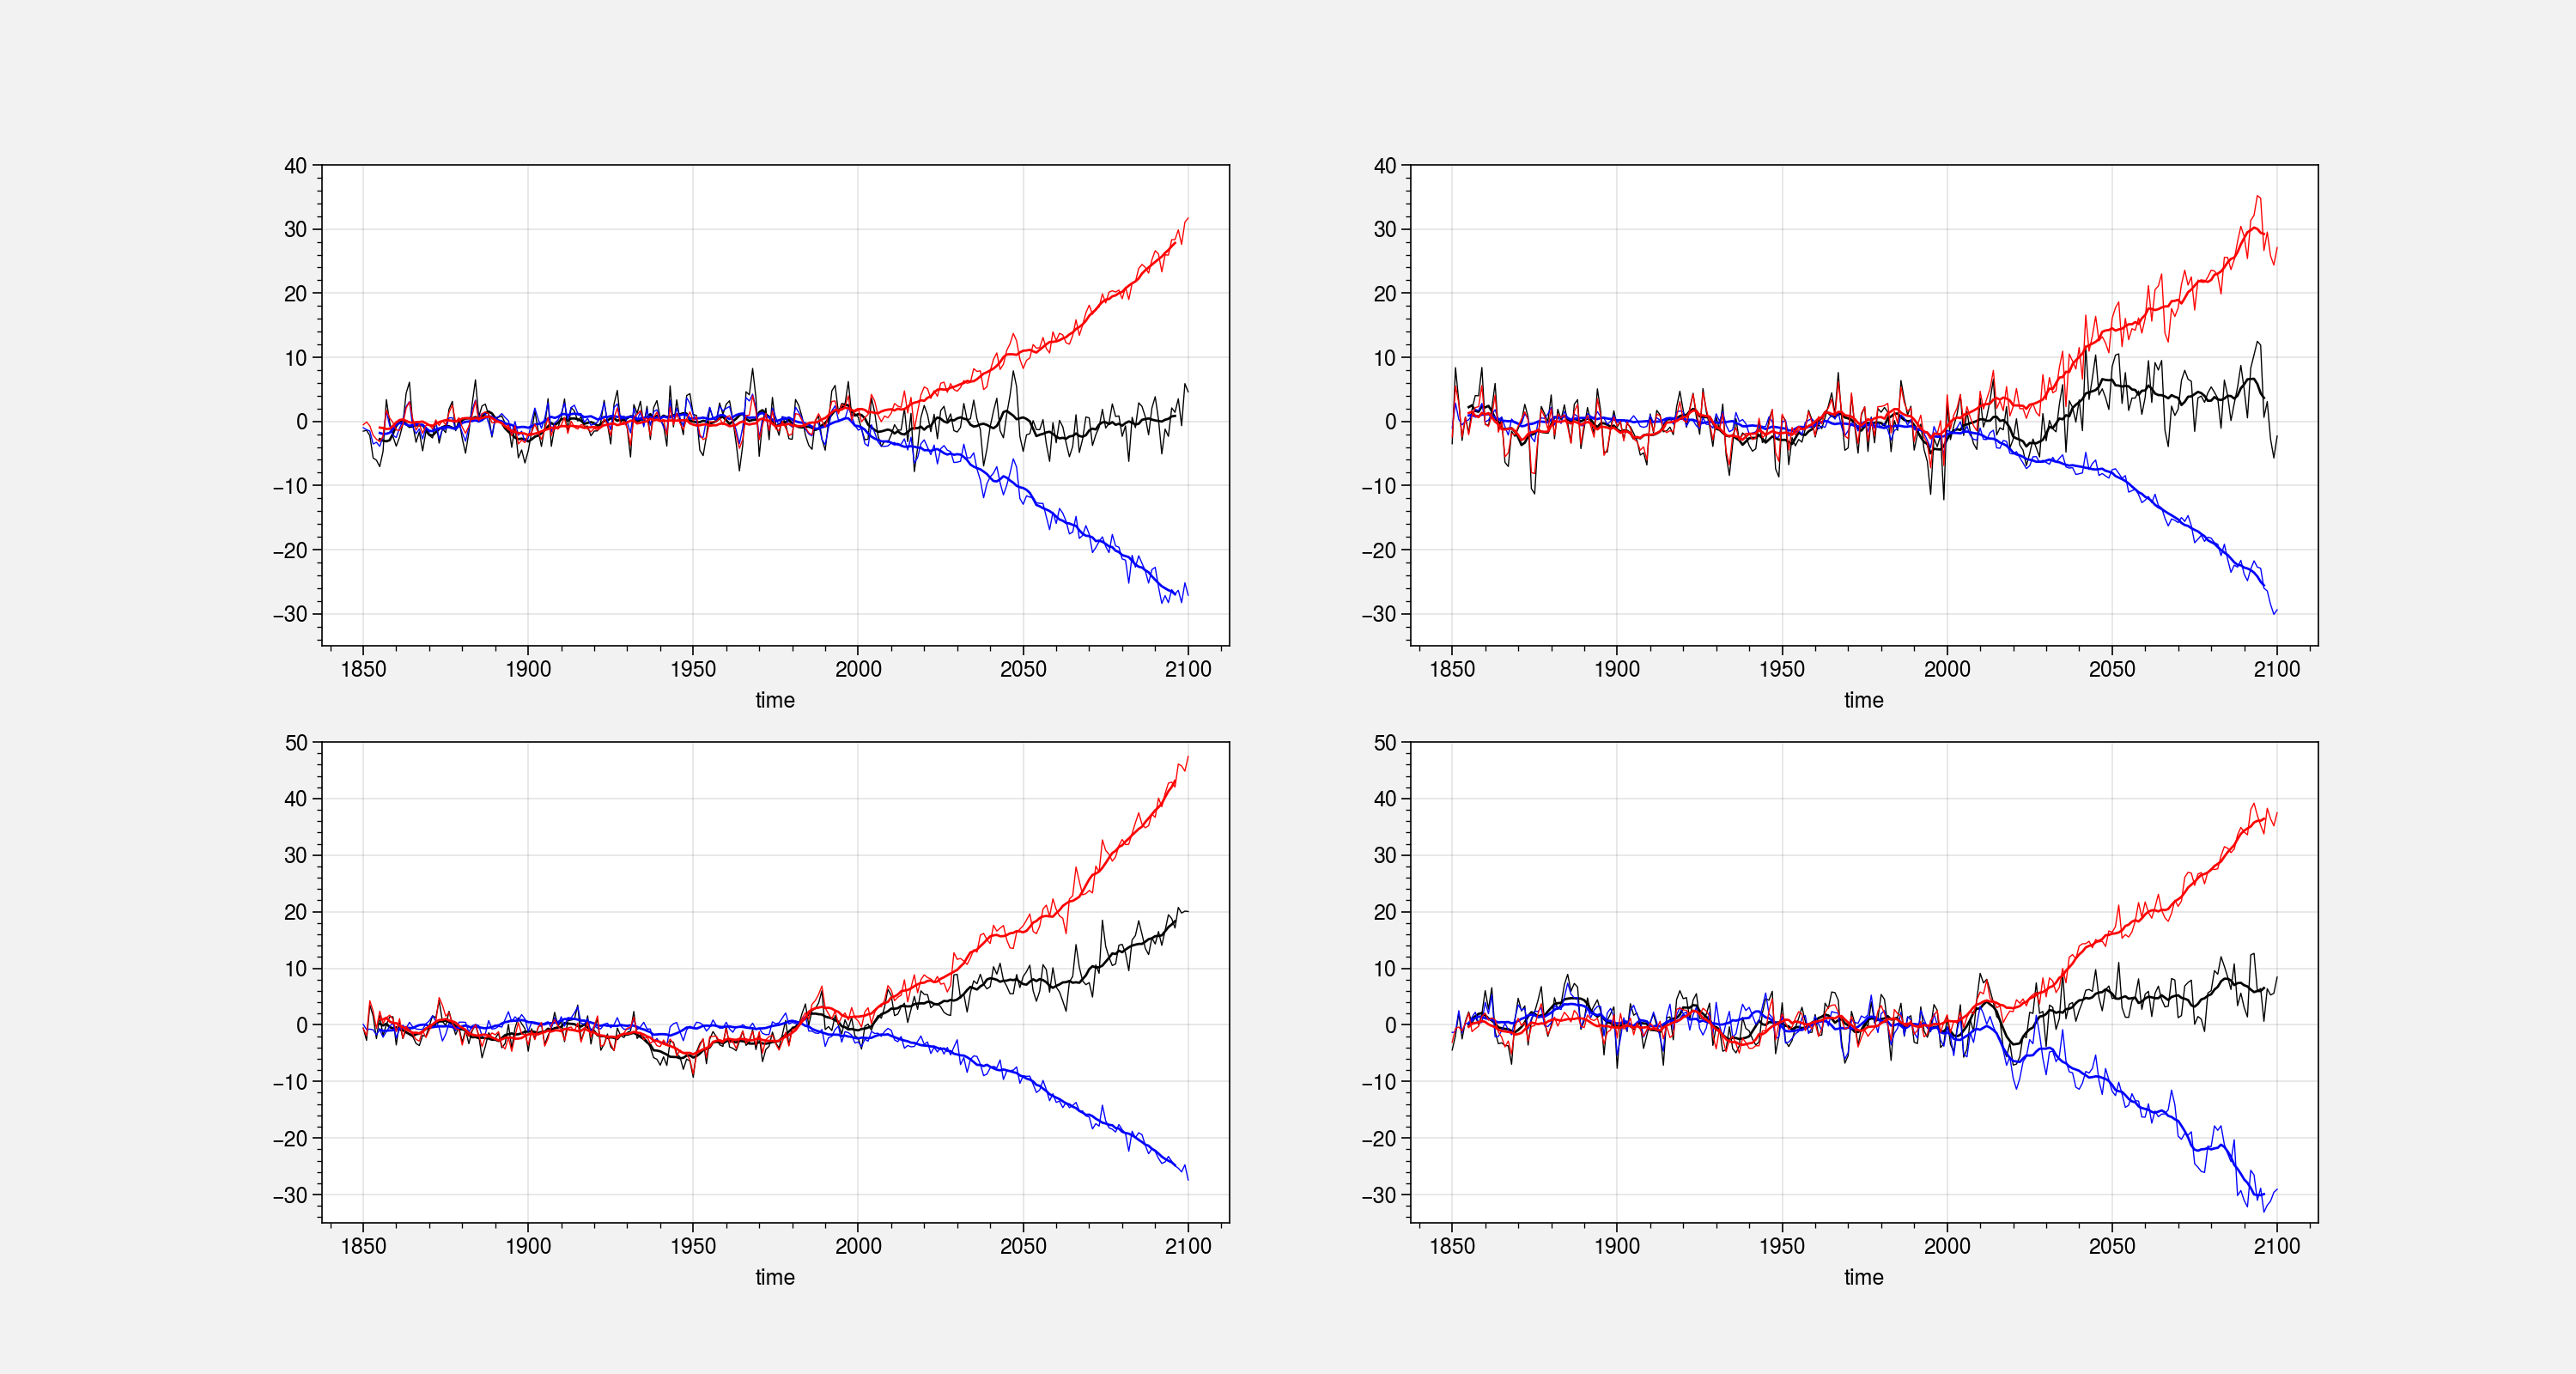

In [17]:
fig, axs = plt.subplots(2,2,figsize=(15,8))

ssh2_r1mav_TLmCL.plot(ax=axs[0,0],color='k',linewidth=0.5)
ssh2_r1mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[0,0],color='k',linewidth=1)
hst2_r1mav_TLmCL.plot(ax=axs[0,0],color='b',linewidth=0.5)
hst2_r1mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[0,0],color='b',linewidth=1)
hm2_r1mav_TLmCL.plot(ax=axs[0,0],color='r',linewidth=0.5)
hm2_r1mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[0,0],color='r',linewidth=1)
axs[0,0].set_ylim(-35,40)

ssh2_r1mav_THmCH.plot(ax=axs[0,1],color='k',linewidth=0.5)
ssh2_r1mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[0,1],color='k',linewidth=1)
hst2_r1mav_THmCH.plot(ax=axs[0,1],color='b',linewidth=0.5)
hst2_r1mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[0,1],color='b',linewidth=1)
hm2_r1mav_THmCH.plot(ax=axs[0,1],color='r',linewidth=0.5)
hm2_r1mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[0,1],color='r',linewidth=1)
axs[0,1].set_ylim(-35,40)

ssh2_r2mav_TLmCL.plot(ax=axs[1,0],color='k',linewidth=0.5)
ssh2_r2mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[1,0],color='k',linewidth=1)
hst2_r2mav_TLmCL.plot(ax=axs[1,0],color='b',linewidth=0.5)
hst2_r2mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[1,0],color='b',linewidth=1)
hm2_r2mav_TLmCL.plot(ax=axs[1,0],color='r',linewidth=0.5)
hm2_r2mav_TLmCL.rolling(time=10, center=True).mean().plot(ax=axs[1,0],color='r',linewidth=1)
axs[1,0].set_ylim(-35,50)

ssh2_r2mav_THmCH.plot(ax=axs[1,1],color='k',linewidth=0.5)
ssh2_r2mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[1,1],color='k',linewidth=1)
hst2_r2mav_THmCH.plot(ax=axs[1,1],color='b',linewidth=0.5)
hst2_r2mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[1,1],color='b',linewidth=1)
hm2_r2mav_THmCH.plot(ax=axs[1,1],color='r',linewidth=0.5)
hm2_r2mav_THmCH.rolling(time=10, center=True).mean().plot(ax=axs[1,1],color='r',linewidth=1)
axs[1,1].set_ylim(-35,50)
# axs[0,1].set_ylim(-30,40)